# 준비

## 라이브러리 호출

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
from Myfunc import show_lcurve

2.4.1


## 데이터 셋 준비

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
    'Sneaker', 'Bag', 'Ankle boot'
]

## 데이터 탐색

In [4]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

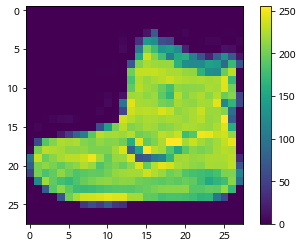

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

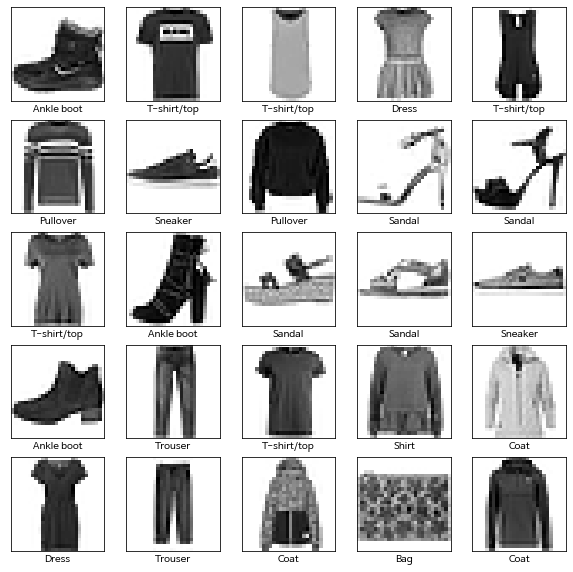

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델링

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6298 - accuracy: 0.7800
Epoch 2/10
1875/1875 [==============================] - 2s 989us/step - loss: 0.3785 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 2s 994us/step - loss: 0.3353 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 2s 984us/step - loss: 0.3126 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 2s 979us/step - loss: 0.2918 - accuracy: 0.8937
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2721 - accuracy: 0.8995
Epoch 7/10
1875/1875 [==============================] - 2s 995us/step - loss: 0.2619 - accuracy: 0.9023
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2527 - accuracy: 0.9058
Epoch 9/10
1875/1875 [==============================] - 2s 991us/step - loss: 0.2474 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step -

# 평가

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3428 - accuracy: 0.8766

Test accuracy: 0.8766000270843506


# 예측

In [14]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [16]:
np.argmax(predictions[0]), test_labels[0]

(9, 9)

## 예측 시각화

In [27]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False);plt.xticks([]);plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label: color = 'blue'; else: color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} {100 * np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

SyntaxError: invalid syntax (712962533.py, line 7)

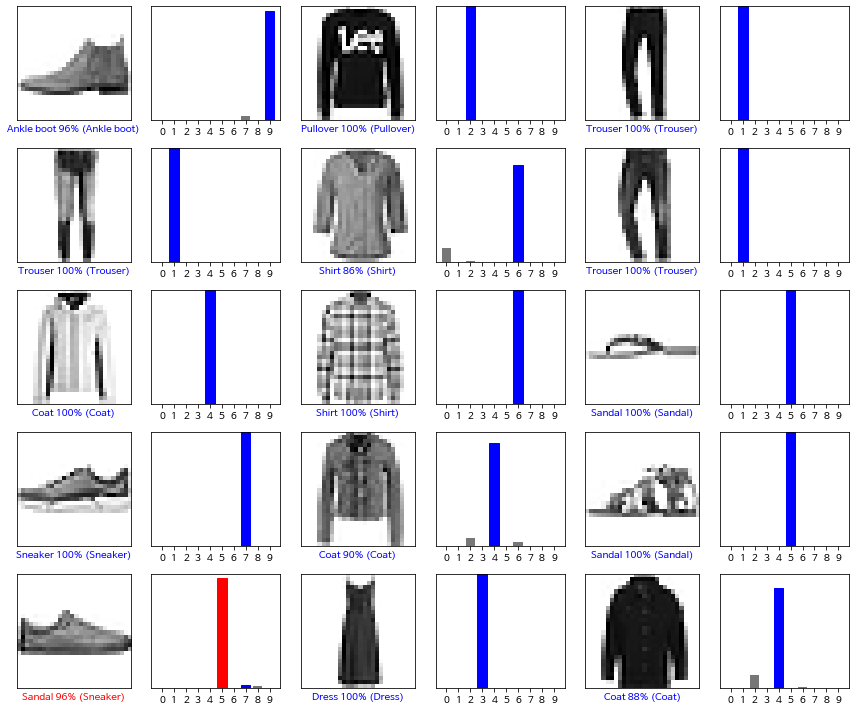

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()